In [6]:
from epipack import SymbolicEpiModel
from epipack.interactive import InteractiveIntegrator, Range, LogRange
import sympy
import numpy as np
%matplotlib widget

In [7]:
S, I, R, R0, tau, omega = sympy.symbols("S I R R_0 tau omega")

In [8]:
I0 = 0.01
model = SymbolicEpiModel([S,I,R])\
         .set_processes([
                (S, I, R0/tau, I, I),
                (I, 1/tau, R),
                (R, omega, S),
            ])\
         .set_initial_conditions({S:1-I0, I:I0})

In [9]:
parameters = {
    R0: LogRange(min=0.1,max=10,step_count=1000),
    tau: Range(min=0.1,max=10,value=8.0),
    omega: 1/14
}

InteractiveIntegrator(children=(VBox(children=(FloatLogSlider(value=1.0, continuous_update=False, description=…

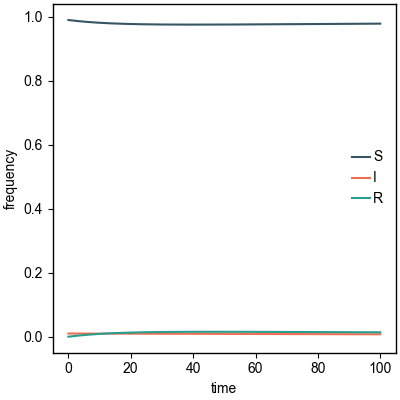

In [14]:
t = np.logspace(-3,2,1000)
InteractiveIntegrator(model, parameters, t, figsize=(4,4))